## DSC 478 - Homework 2
## Name: Serena Yang

In [8]:
#general library:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Question 1: K-Nearest-Neighbor (KNN) classification on Newsgroups [Dataset: newsgroups.zip]
### For this problem you will use a subset of the 20 Newsgroup data set. The full data set contains 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups and has been often used for experiments in text applications of machine learning techniques, such as text classification and text clustering (see the description of the full dataset). The assignment data set contains a subset of 1000 documents and a vocabulary of  terms. Each document belongs to one of two classes Hockey (class label 1) and Microsoft Windows (class label 0). The data has already been split (80%, 20%) into training and test data. The class labels for the training and test data are also provided in separate files. The training and test data contain a row for each term in the vocabulary and a column for each document. The values in the table represent raw term frequencies. The data has already been preprocessed to extract terms, remove stop words and perform stemming (so, the vocabulary contains stems not full terms). Please be sure to read the readme.txt file in the distribution.
#### Your tasks in this problem are the following [Note: for this problem you should not use scikit-learn for classification, but create your own KNN classifer. You may use Pandas, NumPy, standard Python libraries, and Matplotlib.]

In [9]:
path = "/Users/serenayang/Desktop/DSC478/Homework 2/"

In [10]:
train_label = pd.read_table(path + "newsgroups/trainClasses.txt", header = None, index_col=0)
test_label = pd.read_table(path + "newsgroups/testClasses.txt", header = None, index_col=0)
train_label.shape

(800, 1)

In [11]:
train_data = pd.read_table(path + "newsgroups/trainMatrixModified.txt", header = None)
test_data = pd.read_table(path + "newsgroups/testMatrixModified.txt", header = None)
train_data.head() #(5500,800)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
test_data.head()  #(5500,200)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
trainT = train_data.T
testT = test_data.T
trainT.head()

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,2.0,2.0,2.0,1.0,8.0,6.0,2.0,8.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
trainT.shape

(800, 5500)

#### a. Create your own KNN classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity. You may create two separate classifiers, or add this capability as a parameter for the classifier function.

In [15]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

In [16]:
from collections import Counter

def knn_clssifier(x, D, K, label, measure):
    idx, dists = knn_search(x, D, K, measure)
    neigh_labels = label[idx]
    result = Counter(neigh_labels).most_common(1)[0][0]
    return result

#### b. Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label.

In [17]:
def knn_accuracy(train_data, train_label, test_data, test_label, K, measure):
    test_num = len(test_data)
    temp = 0
    for i in range(test_num):
        result = knn_clssifier(test_data[i], train_data, K, train_label, measure)
        if (result != test_label[i]):
            temp += 1
    return 1-temp/test_num

#### c. Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

In [18]:
trainA = np.array(trainT)
testA = np.array(testT)
traintblF = np.array(train_label).flatten()
testtblF = np.array(test_label).flatten()

euclidean = []
cosine = []

for i in range(1,21):
    euclidean.append(knn_accuracy(trainA, traintblF, testA, testtblF, i, 0))

for i in range(1,21):
    cosine.append(knn_accuracy(trainA, traintblF, testA, testtblF, i, 1))

In [12]:
resultFir = {}
resultFir["Euclidean"] = euclidean
resultFir["Cosine"] = cosine

result = pd.DataFrame(resultFir, columns=['Euclidean', 'Cosine'])
result

,Euclidean,Cosine
0,0.780,0.985
1,0.780,0.985
2,0.810,0.970
3,0.810,0.985
4,0.815,0.970
5,0.835,0.985
6,0.765,0.980
7,0.800,0.980
8,0.750,0.975
9,0.850,0.985


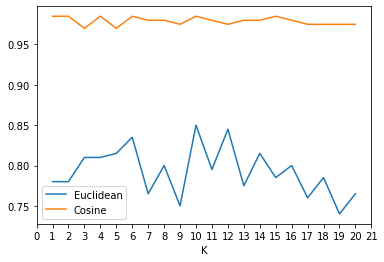

In [13]:
x = list(range(1, 21, 1))

plt.plot(x, euclidean, label='Euclidean') 
plt.plot(x, cosine, label='Cosine') 

plt.xlabel('K')
plt.xticks(range(0,22))
plt.legend(loc = 'best') 

plt.show()

In [14]:
#Comparing from k=1 through k=20, 
#we can see when k=10, the result of Educlidean is the best, and when k=9, the result is the smallest.
#the change of Cosine is very flat, however, when k is getting bigger, the Euclidean result getting lower.


#### d. Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on text categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [15]:
# Get doc counts for each term
train_df = pd.DataFrame([(train_data != 0).sum(1)]).T

# Create a matrix with all entries = NDocs
nDocs = trainT.shape[0]

nMatrix = np.ones(np.shape(train_data), dtype = float) * nDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(nMatrix)

[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]


In [16]:
# Convert each entry into IDF term
IDF = np.log2(np.divide(nMatrix, np.array(train_df)))
print(IDF)

[[4.   4.   4.   ... 4.   4.   4.  ]
 [6.84 6.84 6.84 ... 6.84 6.84 6.84]
 [6.32 6.32 6.32 ... 6.32 6.32 6.32]
 ...
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]]


In [17]:
# Compute TFxIDF values for each document-term entry. This is our matrix.
Train_tfidf = np.array(train_data * IDF)

Train_tfidf

array([[ 8.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [13.67,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [12.64,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [18]:
euclideanSec = []
cosineSec = []

for i in range(20):
    euclideanSec.append(knn_accuracy(Train_tfidf.T, traintblF, testA, testtblF, i+1, 0))

for i in range(1,21):
    cosineSec.append(knn_accuracy(Train_tfidf.T, traintblF, testA, testtblF, i, 1))

In [19]:
resultTFIDF = {}
resultTFIDF["Euclidean"] = euclideanSec
resultTFIDF["Cosine"] = cosineSec

result = pd.DataFrame(resultTFIDF, columns=['Euclidean', 'Cosine'])
result

,Euclidean,Cosine
0,0.515,0.975
1,0.515,0.975
2,0.520,0.980
3,0.515,0.980
4,0.525,0.970
5,0.550,0.980
6,0.500,0.980
7,0.510,0.990
8,0.500,0.995
9,0.505,0.995


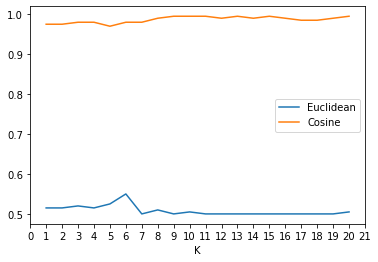

In [20]:
x = list(range(1, 21, 1))

plt.plot(x, euclideanSec, label='Euclidean') 
plt.plot(x, cosineSec, label='Cosine') 

plt.xlabel('K')
plt.xticks(range(0,22))
plt.legend(loc = 'best') 

plt.show()

In [21]:
# Comparing the Cosine results between those weighted with TFxIDF and those without, 
# they are mostly the same: all flat. Comparing the Euclidean results between weighted with TFxIDF and without, 
# there is a noticeable difference. For the work of Euclidean with TFXIDF weight, 
# when k = 6, it is clear to see the result is the best. Also, the trend is flat for Euclidean with weight.

#### e. Create a new classifier based on the Rocchio Method adapted for text categorization [See Week4_TextCategorization ]. You should separate the training function from the classification function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes. Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier.

In [22]:
# without TDIDF
def rocchio_training(train_data, train_label):
    # Get a list of all the classes
    classes =  np.unique(train_label)
    prototypes = {}
    
    # Get indexes of all documents that match our class
    # Get all rows (documents) of data that belong to this class)
    # Add up all rows to get the prototype for the class
    for (i, cls) in enumerate(classes):
        indexes = np.array(train_label.index[train_label.iloc[:, 0] == cls])
        docs = train_data[indexes]
        p = np.sum(docs,axis=0)
        prototypes.update( {i : p} )
        
    return prototypes

In [23]:
# Classification function that takes in prototypes from the training function and the instance to be classified.
def rocchio_classification(prototypes, instance):
    cosineMax = -1
    proto = -1
    
    #get cosine similarity between prototype and instance then update the cosineMax if greater than current max.
    #Also update the prototype if the cosineMax is updated.
    for k, v in prototypes.items():
        cosine = dot(instance, v)/(norm(instance)*norm(v))
        if cosine > cosineMax:
            cosineMax = cosine
            proto = k     
    return proto

In [24]:
#the total frequency, not-TFIDF
prototypes = rocchio_training(trainA, train_label)
prototypes

{0: array([57.,  4.,  5., ...,  1.,  2.,  2.]),
 1: array([45.,  7., 17., ...,  1.,  0.,  0.])}

In [25]:
#NO TFIDF
from numpy import dot
from numpy.linalg import norm

def rocchio_accuracy(data, labels, prototypes):
    total = len(data)
    correct = 0
    
    for i in range(len(data)):
        label = rocchio_classification(prototypes,data[i])
        if label == labels[i]: 
            correct += 1
            
    print("Correct:" + str(correct) + ", Total: " + str(total))
    return correct/total

In [26]:
#evaluate the accuracy of the test set(non-TFIDF)
result = rocchio_accuracy(testA,testtblF,prototypes)
print("accurancy: "+ str(result))

Correct:195, Total: 200
accurancy: 0.975


In [27]:
#the total frequency, with TDIDF
Train_tfidf_DT = Train_tfidf.T
prototypes_idf = rocchio_training(Train_tfidf_DT,train_label)
prototypes

{0: array([57.,  4.,  5., ...,  1.,  2.,  2.]),
 1: array([45.,  7., 17., ...,  1.,  0.,  0.])}

In [28]:
#WITH TFIDF
def rocchio_accuracy_idf(data, labels, prototypes):
    total = len(data)
    correct = 0
    
    for i in range(len(data)):
        x_tfidf = data[i] * IDF.T[i]  
        label = rocchio_classification(prototypes,x_tfidf)
        if label == labels[i]: 
            correct += 1
            
    print("Correct:" + str(correct) + ", Total: " + str(total))
    return correct/total

In [29]:
#evaluate the accuracy of the test set with TDIDF
result = rocchio_accuracy_idf(testA, testtblF, prototypes_idf)
print("accurancy: "+ str(result))

Correct:196, Total: 200
accurancy: 0.98


### Question 2: Classification using scikit-learn [Dataset: bank_data.csv]
#### For this problem you will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine learning module, as well as with some of its preprocessing and model evaluation capabilities.  [Note: This module is already part of the Anaconda distributions. However, if you are using standalone Python distributions, you will need to first obtain and install it]. You will work with a modified subset of a real data set of customers for a bank. This is the same data set used in Assignment 1. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in the data section.
#### Your tasks in this problem are the following:

#### a. Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]

In [30]:
data = pd.read_csv(path + "bank_data.csv").drop('id', 1)
data.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [31]:
pep = data['pep']
data = data.drop('pep',1)
data.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [32]:
data_ssf= pd.get_dummies(data, columns = ['gender','region', 'married','car','savings_acct','current_acct','mortgage'])
data_ssf

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,48,17546.00,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,40,30085.10,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
2,51,16575.40,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
3,23,20375.40,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,57,50576.30,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,47025.00,2,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1
596,30,9672.25,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
597,31,15976.30,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
598,29,14711.80,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1


In [33]:
from sklearn.model_selection import train_test_split

data_train, data_test, pep_train, pep_test = train_test_split(data_ssf, pep, test_size=0.2, random_state=33)
data_test

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
456,32,13267.6,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
366,59,29866.9,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
131,61,41609.5,3,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1
448,53,48971.6,3,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0
337,65,38080.9,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,18,12117.3,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0
492,61,27756.3,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1
177,41,30099.3,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1
215,27,17610.3,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0


In [34]:
pep_test

456     NO
366    YES
131     NO
448    YES
337     NO
      ... 
438     NO
492    YES
177    YES
215     NO
516    YES
Name: pep, Length: 120, dtype: object

#### b. Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, compute the average accuracy score. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results).

In [35]:
#Performing min-max normalization to rescale numeric attributes.
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(data_train)
data_trainN = min_max_scaler.transform(data_train)
data_testN = min_max_scaler.transform(data_test)

np.set_printoptions(precision=2, linewidth=80, suppress=True)
data_trainN

array([[0.57, 0.46, 0.67, ..., 1.  , 1.  , 0.  ],
       [0.8 , 0.78, 0.  , ..., 0.  , 1.  , 0.  ],
       [0.14, 0.16, 0.  , ..., 1.  , 1.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 1.  , 0.  , 1.  ],
       [0.45, 0.28, 0.  , ..., 1.  , 1.  , 0.  ],
       [0.88, 0.91, 0.67, ..., 0.  , 1.  , 0.  ]])

In [36]:
data_testN

array([[0.29, 0.12, 0.  , ..., 1.  , 0.  , 1.  ],
       [0.84, 0.41, 0.33, ..., 1.  , 1.  , 0.  ],
       [0.88, 0.62, 1.  , ..., 1.  , 0.  , 1.  ],
       ...,
       [0.47, 0.42, 0.  , ..., 1.  , 0.  , 1.  ],
       [0.18, 0.2 , 0.  , ..., 1.  , 1.  , 0.  ],
       [0.35, 0.25, 0.  , ..., 0.  , 1.  , 0.  ]])

In [37]:
#First, use KNN classifer. You can vary K and monitor the accuracy metrics (see below) to find the best value.
from sklearn import neighbors, tree, naive_bayes

n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(data_trainN, pep_train)

KNeighborsClassifier(weights='distance')

In [38]:
#Next, we call the predict function on the test intances to produce the predicted classes.
knnpreds_test = knnclf.predict(data_testN)
print(knnpreds_test)

['YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO']


In [39]:
#scikit-learn has various modules that can be used to evaluate classifier accuracy
from sklearn.metrics import classification_report
print(classification_report(pep_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.68      0.73      0.70        66
         YES       0.63      0.57      0.60        54

    accuracy                           0.66       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.66      0.66      0.66       120



In [40]:
#confusion matrix
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(pep_test, knnpreds_test)
print(knncm)

[[48 18]
 [23 31]]


In [41]:
# compute the average accuracy score across the test instances
print (knnclf.score(data_testN, pep_test))

0.6583333333333333


In [42]:
#compared to the performance on the training data itself (to check for over- or under-fitting)
print(knnclf.score(data_trainN, pep_train))

1.0


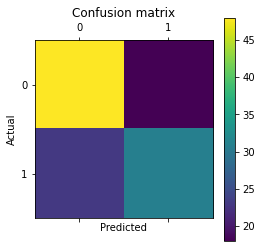

In [43]:
# Visualizing confusion matrix using matplotlib
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [44]:
#testing with different values of K for KNN with weigthing

test = []
train = []
results = {}

for i in range(5,20):
    knnclf = neighbors.KNeighborsClassifier(i, weights='distance')
    knnclf.fit(data_trainN, pep_train)
    trainScore = knnclf.score(data_trainN, pep_train)
    testScore = knnclf.score(data_testN, pep_test)
    train.append(trainScore)
    test.append(testScore)

In [45]:
results["train"] = train
results["test"] = test
withWeighting = pd.DataFrame(results, columns=['train', 'test'])
withWeighting

,train,test
0,1.0,0.658333
1,1.0,0.650000
2,1.0,0.650000
3,1.0,0.633333
4,1.0,0.650000
5,1.0,0.650000
6,1.0,0.650000
7,1.0,0.625000
8,1.0,0.616667
9,1.0,0.625000


In [46]:
# testing with different values of K for KNN without weigthing

test = []
train = []
results = {}

for i in range(5,20):
    knnclf = neighbors.KNeighborsClassifier(i)
    knnclf.fit(data_trainN, pep_train)
    trainScore = knnclf.score(data_trainN, pep_train)
    testScore = knnclf.score(data_testN, pep_test)
    train.append(trainScore)
    test.append(testScore)

In [47]:
results["train"] = train
results["test"] = test
withoutWeighting = pd.DataFrame(results, columns=['train', 'test'])
withoutWeighting

,train,test
0,0.783333,0.666667
1,0.762500,0.650000
2,0.777083,0.650000
3,0.768750,0.683333
4,0.770833,0.675000
5,0.768750,0.691667
6,0.770833,0.641667
7,0.754167,0.641667
8,0.745833,0.633333
9,0.745833,0.641667


In [48]:
#Comparing different values of K and the weight parameter from 5 to 20, when using weight, the training column are
# all 1 which means overfitting. The test column are really close. For the result without weighted, the training
# column's range is 0.7 - 0.78. For the testing accuracy are all little be higher than the testing accuracy with weight.
# when k=17-18, the testing accuracy without weighted are the best.
# when k=18, the testing accuracy with weighted is the best and when k=17 is the second best.

#### c. Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the Naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy scores for each classifier. For each model, compare the average accuracy scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

In [49]:
#decision tree classifier
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(data_train, pep_train)

In [50]:
treepreds_test = treeclf.predict(data_test)
print (treepreds_test)

['NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [51]:
# compute the average accuracy score across the test instances
print (treeclf.score(data_test, pep_test))

0.8166666666666667


In [52]:
#compared to the performance on the training data itself (to check for over- or under-fitting)
print (treeclf.score(data_train, pep_train))

1.0


In [53]:
print(classification_report(pep_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.82      0.85      0.84        66
         YES       0.81      0.78      0.79        54

    accuracy                           0.82       120
   macro avg       0.82      0.81      0.81       120
weighted avg       0.82      0.82      0.82       120



In [54]:
treecm = confusion_matrix(pep_test, treepreds_test, labels=['YES','NO'])
print(treecm)

[[42 12]
 [10 56]]


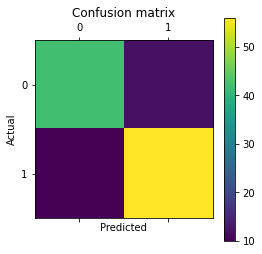

In [55]:
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [56]:
#(Gaussian) Naive Bayes Classifier
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(data_train, pep_train)
nbpreds_test = nbclf.predict(data_test)
print (nbpreds_test)

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO']


In [57]:
## compute the average accuracy score across the test instances
print (nbclf.score(data_train, pep_train))

0.65625


In [58]:
#compared to the performance on the training data itself (to check for over- or under-fitting)
print (nbclf.score(data_test, pep_test))

0.5916666666666667


In [59]:
nbccm = confusion_matrix(pep_test, nbpreds_test, labels=['YES','NO'])
print(nbccm)

[[22 32]
 [17 49]]


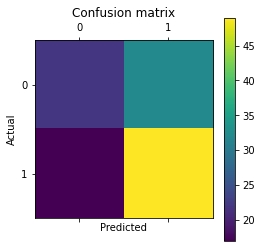

In [60]:
plt.matshow(nbccm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [61]:
#Compare with the decision tree and (Gaussian) Naive Bayes Classifier, the accuracy of the decision tree 
#shows a higher score. And (Gaussian) Naive Bayes Classifier's result is similar to the result of the KNN 
#classifier: the average scores are all around 0.66. The decision tree, the performance on the training datas is 1,
#which means decision tree  classifier is overfitting to the data, in other wrors, there is variance. 
#We hope decision tree can reduce the variance.
#Naive Bayes classifier's cannot reduce the variance because the scores on it is lower.

#### d. Discuss your observations based on the above experiments.

In [62]:
#Compare with these three classifiers, it appears that Decision Tree classifier has the highest average 
#accuracy for both the training and testing sets. The second one is KNN classifier, and (Gaussian) Naive Bayes 
#Classifier is the last one. Decision Tree classifier has an overfitting problem. We noticed that when 
#changing the values for K and the weight method in the KNN classifier it did not change the scores that much in 
#terms of the test data but using a weighted method greatly improved the training data scores. For the Naive bayes 
#classifier, the lower values can be seen as not enough to be considered accurate for both the training and 
#testing data. I think from the results, KNN classifer is best in this case. When K=17-18 with no weightd, the 
#accuracy is the best.This is because the training scores were high but not high enough to be considered 
#overfitting and the training data scores were slightly higher than the values when using weighted method on 
#the same data.

### Question 3: Data Analysis and Predictive Modeling on Census data [Dataset: adult-modified.csv]
#### For this problem you will use a simplified version of the Adult Census Data Set. In the subset provided here, some of the attributes have been removed and some preprocessing has been performed.
#### Your tasks in this problem are the following:

#### a. Preprocessing and data analysis:

#### 1. Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.

In [63]:
data = pd.read_csv(path + "adult-modified.csv")
data

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38,Private,10,Married,White,Male,60,>50K
9996,25,Private,9,Single,White,Female,8,<=50K
9997,21,Private,10,Single,Black,Male,40,<=50K
9998,?,Private,2,Married,White,Male,53,<=50K


In [64]:
#drop missing categorical attributes rows
dropvalue = data[(data['workclass'] =='?')|(data['marital-status'] == '?')|(data['race'] =='?')|(data['sex'] =='?')|(data['income'] =='?')].index
data.drop(dropvalue, inplace=True)
data.shape

(9412, 8)

In [65]:
print(data.age.dtype)
print(data.education.dtype)
print(data['hours-per-week'].dtype)

object
int64
int64


In [66]:
#covert all null value to 0 and convert 'age' column to integer type
data = data.replace('?', 0)
data['age'] = data['age'].astype(int)
#covert 0 into NaN
data = data.replace(0, np.nan)

In [67]:
#convert nan into mean
data['age'].fillna((data['age'].mean()), axis=0, inplace=True)
data['education'].fillna((data['education'].mean()),  axis=0, inplace=True)
data['hours-per-week'].fillna((data['hours-per-week'].mean()),  axis=0, inplace=True)

In [68]:
data

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.000000,Public,13,Single,White,Male,40,<=50K
1,50.000000,Self-emp,13,Married,White,Male,13,<=50K
2,38.000000,Private,9,Single,White,Male,40,<=50K
3,53.000000,Private,7,Married,Black,Male,40,<=50K
4,28.000000,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38.000000,Private,10,Married,White,Male,60,>50K
9996,25.000000,Private,9,Single,White,Female,8,<=50K
9997,21.000000,Private,10,Single,Black,Male,40,<=50K
9998,38.364632,Private,2,Married,White,Male,53,<=50K


In [69]:
data.describe()

,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.364632,10.125266,41.080217
std,12.962034,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


#### 2. Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distributions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.

<AxesSubplot:title={'center':'Age Attribute'}, ylabel='Frequency'>

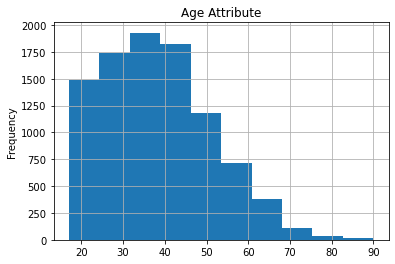

In [70]:
data["age"].plot(kind="hist", grid = True, title="Age Attribute")

<AxesSubplot:title={'center':'workclass Attribute'}>

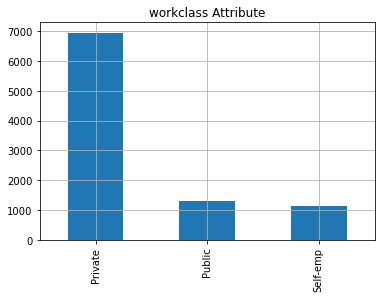

In [71]:
data["workclass"].value_counts().plot(kind='bar', grid = True, title="workclass Attribute")

<AxesSubplot:title={'center':'education Attribute'}, ylabel='Frequency'>

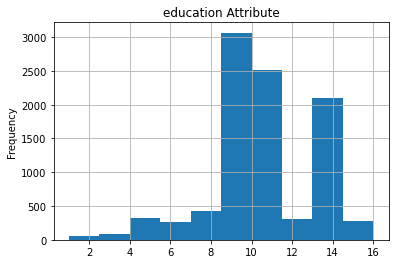

In [72]:
data["education"].plot(kind="hist",grid = True, title="education Attribute")

<AxesSubplot:title={'center':'marital-status Attribute'}>

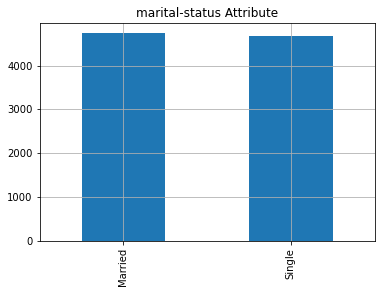

In [73]:
data["marital-status"].value_counts().plot(kind='bar', grid = True, title="marital-status Attribute")

<AxesSubplot:title={'center':'race Attribute'}>

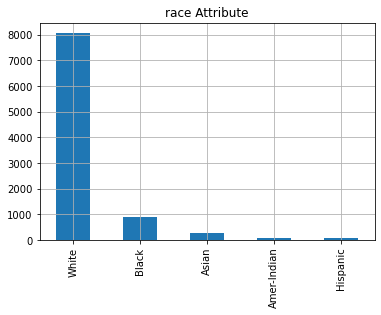

In [74]:
data["race"].value_counts().plot(kind='bar', grid = True, title="race Attribute")

<AxesSubplot:title={'center':'sex Attribute'}>

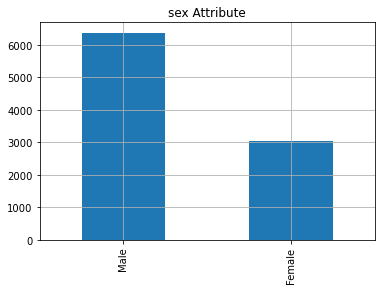

In [75]:
data["sex"].value_counts().plot(kind='bar', grid = True, title="sex Attribute")

<AxesSubplot:title={'center':'hours-per-week Attribute'}, ylabel='Frequency'>

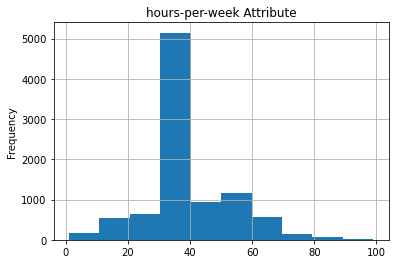

In [76]:
data["hours-per-week"].plot(kind="hist",grid = True, title="hours-per-week Attribute")

<AxesSubplot:title={'center':'income Attribute'}>

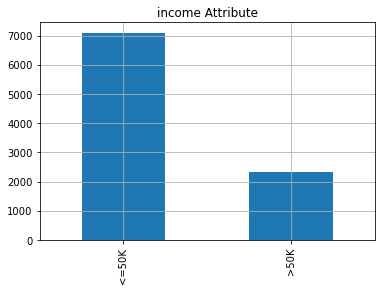

In [77]:
data["income"].value_counts().plot(kind='bar', grid = True, title="income Attribute")

#### 3. Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.

In [78]:
#cross-tabulations: education+race
education_race = pd.crosstab(data["education"], data["race"])
education_race

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


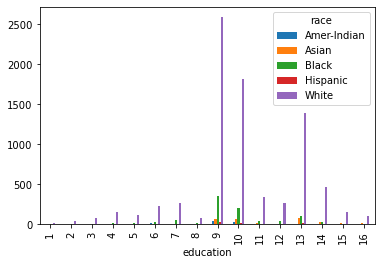

In [79]:
plt.show(education_race.plot(kind="bar"))

#moset are from education 9,10,13 years and white

In [80]:
#cross-tabulations: work-class+income
work_income = pd.crosstab(data["workclass"], data["income"])
work_income

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


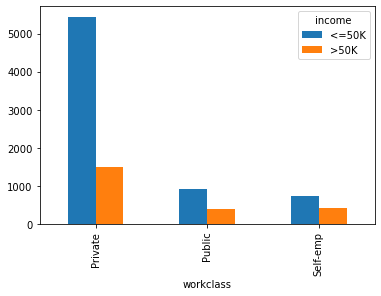

In [81]:
plt.show(work_income.plot(kind="bar"))

#<=50K is more than >50K in any workclass, and private workclass is the most.

In [82]:
#cross-tabulations: work-class+race
work_race = pd.crosstab(data["workclass"], data["race"])
work_race

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


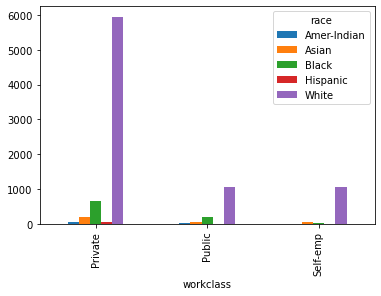

In [83]:
plt.show(work_race.plot(kind="bar"))

#white is more than other race, and private workclass is averagely more than other workclass. 

In [84]:
#cross-tabulations: race+income
race_income = pd.crosstab(data["race"], data["income"])
race_income

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


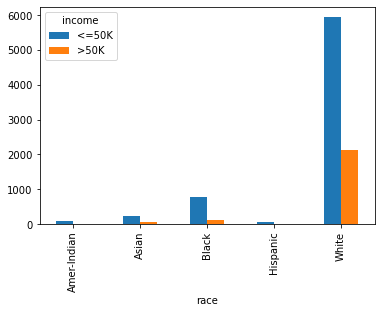

In [85]:
plt.show(race_income.plot(kind="bar"))

#white with <=50K is a large proportion in this situation. America-indian ns hispanic have barely number of >50K.
#White is the most porpotion in the number of >50K.

In [86]:
#create a table or chart showing percentages of each race category that fall in the low-income group
race_income['low_income'] = race_income['<=50K']/(race_income['<=50K']  + race_income['>50K'])
race_income

income,<=50K,>50K,low_income
race,,,
Amer-Indian,83,9,0.902174
Asian,224,67,0.769759
Black,773,119,0.866592
Hispanic,69,6,0.920000
White,5944,2118,0.737286


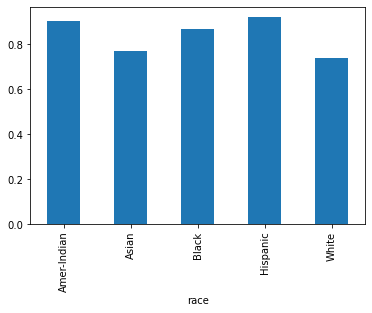

In [87]:
plt.show(race_income["low_income"].plot(kind="bar"))

#Amer-Indian and hispanic has more population fall into tje low-income pool. White is the less race. 

In [88]:
# 9 years of education makes up the highest amount of people that fall under the low income group 
#and 13 years of education makes up the highest amount of people that fall under the high income group.

#### 4. Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.

In [89]:
low_income = data[data['income'] == '<=50K']
high_income = data[data['income'] == '>50K']

In [90]:
#income across age
pd.crosstab(data["income"], data["age"])

age,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,...,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,88.0,90.0
income,,,,,,,,,,,,,,,,,,,,,
<=50K,83,128,182,214,188,202,247,220,239,223,...,4,5,4,5,1,1,3,1,1,10
>50K,0,0,1,0,1,4,4,13,17,14,...,1,1,0,0,0,0,0,0,0,4


In [91]:
#low-income across workclass
low_income['workclass'].value_counts(normalize=True) * 100

Private     76.737629
Public      13.041026
Self-emp    10.221345
Name: workclass, dtype: float64

In [92]:
#high-income across workclass
high_income['workclass'].value_counts(normalize=True) * 100

Private     64.855541
Self-emp    18.240621
Public      16.903838
Name: workclass, dtype: float64

In [93]:
#income across education
pd.crosstab(data["income"], data["education"])

education,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
income,,,,,,,,,,,,,,,,
<=50K,12,45,76,164,135,245,310,93,2539,1737,298,221,921,225,45,27
>50K,0,1,5,16,7,23,14,7,526,388,91,83,656,290,126,86


In [94]:
#low-income across marital-status
low_income['marital-status'].value_counts(normalize=True) * 100

Single     61.511349
Married    38.488651
Name: marital-status, dtype: float64

In [95]:
#high-income across marital-status
high_income['marital-status'].value_counts(normalize=True) * 100

Married    86.545925
Single     13.454075
Name: marital-status, dtype: float64

In [96]:
#low-income across race
low_income['race'].value_counts(normalize=True) * 100

White          83.800930
Black          10.898069
Asian           3.158043
Amer-Indian     1.170168
Hispanic        0.972790
Name: race, dtype: float64

In [97]:
#high-income across race
high_income['race'].value_counts(normalize=True) * 100

White          91.332471
Black           5.131522
Asian           2.889176
Amer-Indian     0.388098
Hispanic        0.258732
Name: race, dtype: float64

In [98]:
#low-income across sex
low_income['sex'].value_counts(normalize=True) * 100

Male      62.371352
Female    37.628648
Name: sex, dtype: float64

In [99]:
#high-income across sex
high_income['sex'].value_counts(normalize=True) * 100

Male      84.476067
Female    15.523933
Name: sex, dtype: float64

In [100]:
#income across hours-per-week
pd.crosstab(data["income"], data["hours-per-week"])

hours-per-week,1,2,3,4,5,6,7,8,9,10,...,84,85,87,88,89,90,94,97,98,99
income,,,,,,,,,,,,,,,,,,,,,
<=50K,1,4,6,5,9,13,3,30,6,75,...,6,4,1,1,1,7,1,0,3,9
>50K,1,0,0,0,3,1,1,3,0,4,...,5,1,0,0,0,3,0,1,1,7


#### b. Classification and Model Evaluation:

#### 1. Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps). Split the data into training and test sets (80%-20% split)

In [101]:
#create dummy variables for the categorical attributes
data_matrix = pd.get_dummies(data, columns=['workclass','marital-status','race','sex','income'])
data_matrix

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39.000000,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50.000000,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38.000000,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53.000000,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28.000000,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38.000000,10,60,1,0,0,1,0,0,0,0,0,1,0,1,0,1
9996,25.000000,9,8,1,0,0,0,1,0,0,0,0,1,1,0,1,0
9997,21.000000,10,40,1,0,0,0,1,0,0,1,0,0,0,1,1,0
9998,38.364632,2,53,1,0,0,1,0,0,0,0,0,1,0,1,1,0


In [102]:
#Then separate the target attribute ("income_>50K") from the attributes used for training.
target = data_matrix['income_>50K']
target

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: income_>50K, Length: 9412, dtype: uint8

In [103]:
#drop "income_<=50K" and "income_>50K"
data_matrix = data_matrix.drop(['income_<=50K', 'income_>50K'],axis=1)
data_matrix

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.000000,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.000000,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.000000,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.000000,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.000000,13,40,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38.000000,10,60,1,0,0,1,0,0,0,0,0,1,0,1
9996,25.000000,9,8,1,0,0,0,1,0,0,0,0,1,1,0
9997,21.000000,10,40,1,0,0,0,1,0,0,1,0,0,0,1
9998,38.364632,2,53,1,0,0,1,0,0,0,0,0,1,0,1


In [104]:
#Split the data into training and test sets (80%-20% split)
data_train, data_test, income_train, income_test = train_test_split(data_matrix, target, test_size=0.2, random_state=33)
print("data_train", data_train.shape)
print("data_test", data_test.shape)

data_train (7529, 15)
data_test (1883, 15)


#### 2. Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.

In [105]:
#Naive Bayes (Gaussian)
nbclf = naive_bayes.GaussianNB()

In [106]:
from sklearn.model_selection import cross_val_score
nbcv_scores = cross_val_score(nbclf, data_matrix, target, cv=10)
print(nbcv_scores)

[0.73 0.7  0.73 0.71 0.73 0.71 0.71 0.72 0.73 0.71]


In [107]:
print("Overall Average Accuracy for Naive Bayes (Gaussian): %0.2f (+/- %0.2f)" % (nbcv_scores.mean(), nbcv_scores.std() * 2))

Overall Average Accuracy for Naive Bayes (Gaussian): 0.72 (+/- 0.02)


In [108]:
#decision tree(using "entropy" as selection criteria)
treeclf = tree.DecisionTreeClassifier(criterion='entropy')
treecv_scores = cross_val_score(treeclf, data_matrix, target, cv=10)
print("Overall Average Accuracy for Decision Tree: %0.2f (+/- %0.2f)" % (treecv_scores.mean(), treecv_scores.std() * 2))

Overall Average Accuracy for Decision Tree: 0.76 (+/- 0.03)


In [109]:
#linear discriminant analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldclf = LinearDiscriminantAnalysis()
ldcv_scores = cross_val_score(ldclf, data_matrix, target, cv=10)
print("Overall Average Accuracy for Linear Discriminant Analysis: %0.2f (+/- %0.2f)" % (ldcv_scores.mean(), ldcv_scores.std() * 2))

Overall Average Accuracy for Linear Discriminant Analysis: 0.81 (+/- 0.02)


#### 3. For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.

In [110]:
treeclf = treeclf.fit(data_train, income_train)

In [115]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(treeclf,out_file=path + 'tree.dot', feature_names=data_train.columns)

In [ ]:
from graphviz import render
render('dot', 'png', path + 'tree.dot')

In [119]:
# I have tried a lot of ways to download the graphviz, but it seems the download location was not right by running
#'!pip install graphviz', therefore, I can only save the data into tree.dot. 
#After I saved the tree.dot, I tried to convert by using online tool, but the output is a folder of 157 png photos.

In [112]:
!pip install graphviz

  Using cached graphviz-0.16-py2.py3-none-any.whl (19 kB)


In [113]:
conda install graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                     failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - alabaster -> python[version='>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.5,<3.6.0a0']
  - anaconda-navigator==2.0.1 -> python[version='>=2.7,<2.8.0a0|>=3.5,<3.6.0a0']
  - anaconda==2020.11 -> python[version='3.7.9|3.8.5',build='h26836e1_0|h26836e1_1']
  - argon2-cffi -> python[version='>=2.7,<2.8.0a0|>=3.5,<3.6.0a0'

json5 -> python -> pip
conda-token -> python -> pip
mkl-service -> python[version='>=3.7,<3.8.0a0'] -> pip
python-dateutil -> python -> pip
jupyterlab -> python[version='>=3.6'] -> pip
simplegeneric -> python[version='>=3.9,<3.10.0a0'] -> pip
urllib3 -> python[version='<4.0'] -> pip
sphinxcontrib-htmlhelp -> python[version='>=3.5'] -> pip
conda-package-handling -> python[version='>=3.9,<3.10.0a0'] -> pip
jupyterlab_pygments -> python -> pip
sphinxcontrib -> python[version='>=3.9,<3.10.0a0'] -> pip
ply -> python[version='>=3.9,<3.10.0a0'] -> pip
dask -> python[version='>=3.7'] -> pip
sphinxcontrib-jsmath -> python[version='>=3.5'] -> pip

Package sqlite conflicts for:
typing_extensions -> python[version='>=3.5'] -> sqlite[version='>=3.20.1,<4.0a0|>=3.22.0,<4.0a0|>=3.23.1,<4.0a0|>=3.24.0,<4.0a0|>=3.25.2,<4.0a0|>=3.25.3,<4.0a0|>=3.26.0,<4.0a0|>=3.27.2,<4.0a0|>=3.29.0,<4.0a0|>=3.30.0,<4.0a0|>=3.30.1,<4.0a0|>=3.31.1,<4.0a0|>=3.32.3,<4.0a0|>=3.33.0,<4.0a0|>=3.35.4,<4.0a0']
threadpoolctl -> p

dask -> dask-core[version='0.15.2.*|0.15.3.*|0.15.4.*|0.16.0.*|0.16.1.*|0.17.0.*|0.17.1.*|0.17.2.*|0.17.3.*|0.17.4.*|0.17.5.*|0.18.0.*|0.18.1.*|0.18.2.*|0.19.0.*|0.19.1.*|0.19.2.*|0.19.3.*|0.19.4.*|0.20.0.*|0.20.1.*|0.20.2.*|1.0.0.*|1.1.1.*|1.1.2.*|1.1.3.*|1.1.4.*|1.1.5.*|1.2.0.*|1.2.2.*|2.0.0.*|2.1.0.*|2.10.0.*|2.10.1.*|2.11.0.*|2.12.0.*|2.13.0.*|2.14.0.*|2.15.0.*|2.16.0.*|2.17.0.*|2.17.2.*|2.18.1.*|2.19.0.*|2.20.0.*|2.22.0.*|2.23.0.*|2.24.0.*|2.25.0.*|2.26.0.*|2.27.0.*|2.29.0.*|2.30.0.*|2020.12.0.*|2021.1.0.*|2021.1.1.*|2021.2.0.*|2021.3.0.*|2021.3.1.*|2021.4.0.*|2.9.2.*|2.9.1.*|2.9.0.*|2.8.1.*|2.8.0.*|2.7.0.*|2.6.0.*|2.5.2.*|2.5.0.*|2.4.0.*|2.3.0.*|2.2.0.*']
anaconda==2020.11 -> dask==2.30.0=py_0 -> dask-core[version='2.30.0.*|>=2.9.0|>=0.15.0']
scikit-image -> dask[version='>=0.5'] -> dask-core[version='0.15.2.*|0.15.3.*|0.15.4.*|0.16.0.*|0.16.1.*|0.17.0.*|0.17.1.*|0.17.2.*|0.17.3.*|0.17.4.*|0.17.5.*|0.18.0.*|0.18.1.*|0.18.2.*|0.19.0.*|0.19.1.*|0.19.2.*|0.19.3.*|0.19.4.*|0.20.0.*|0


Note: you may need to restart the kernel to use updated packages.


In [118]:
from IPython.display import Image
Image(filename = path + 'tree.png', width=800)

IsADirectoryError: [Errno 21] Is a directory: '/Users/serenayang/Desktop/DSC478/Homework2/tree.png'